In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploring the Data 

## 1 Importing the dataset

In [6]:
frame = pd.read_csv('data.csv')

In [7]:
frame

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


## 2 Number of observations

In [11]:
frame.shape[0]

943

## 3 Dataset Columns

In [12]:
frame.shape[1]

5

In [13]:
frame.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

## 4 Columns' data types

In [14]:
frame.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

## 5 Unique Occupations And Occupation frequencies

In [25]:
all_occupations = frame.occupation.unique()  # Or frame['occupation'].unique()
', '.join(list(all_occupations))

'technician, other, writer, executive, administrator, student, lawyer, educator, scientist, entertainment, programmer, librarian, homemaker, artist, engineer, marketing, none, healthcare, retired, salesman, doctor'

In [22]:
most_frequent_occupation = frame.occupation.value_counts().head(1)
dict(most_frequent_occupation)

{'student': 196}

## 6 Age mean and Least occuring age value

In [28]:
mean_age = frame.age.mean()
"{} years, {} days".format(int(mean_age),int((mean_age-int(mean_age))*365))

'34 years, 18 days'

In [115]:
least_occuring_age.index[0]

7

In [117]:
least_occuring_age = frame.age.value_counts().tail(1)
"least occuring age {} years ({} occurence(s))".format(
    least_occuring_age.index[0],least_occuring_age.values[0]
)

'least occuring age 7 years (1 occurence(s))'

# 2 Specifying the queries

## 1 Mean Age per Occupation

In [46]:
mean_ages_per_occ = frame.groupby('occupation').age.mean()
mean_ages_per_occ

{'administrator': 38.74683544303797,
 'artist': 31.392857142857142,
 'doctor': 43.57142857142857,
 'educator': 42.01052631578948,
 'engineer': 36.38805970149254,
 'entertainment': 29.22222222222222,
 'executive': 38.71875,
 'healthcare': 41.5625,
 'homemaker': 32.57142857142857,
 'lawyer': 36.75,
 'librarian': 40.0,
 'marketing': 37.61538461538461,
 'none': 26.555555555555557,
 'other': 34.523809523809526,
 'programmer': 33.121212121212125,
 'retired': 63.07142857142857,
 'salesman': 35.666666666666664,
 'scientist': 35.54838709677419,
 'student': 22.081632653061224,
 'technician': 33.148148148148145,
 'writer': 36.31111111111111}

In [34]:
frame.groupby('occupation').age.mean().apply(
    lambda x:"{} years, {} days".format(int(x),int((x-int(x))*365)) if x != int(x) else "{} years".format(int(x))
)

occupation
administrator    38 years, 272 days
artist           31 years, 143 days
doctor           43 years, 208 days
educator           42 years, 3 days
engineer         36 years, 141 days
entertainment     29 years, 81 days
executive        38 years, 262 days
healthcare       41 years, 205 days
homemaker        32 years, 208 days
lawyer           36 years, 273 days
librarian                  40 years
marketing        37 years, 224 days
none             26 years, 202 days
other            34 years, 191 days
programmer        33 years, 44 days
retired           63 years, 26 days
salesman         35 years, 243 days
scientist        35 years, 200 days
student           22 years, 29 days
technician        33 years, 54 days
writer           36 years, 113 days
Name: age, dtype: object

Mean Age Per Occupation


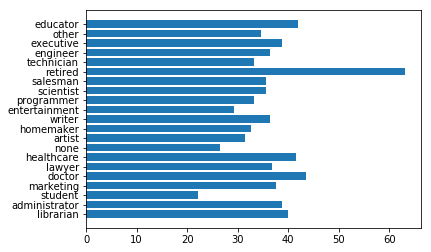

In [97]:
labels = list(dict(mean_ages_per_occ).keys())
values = [dict(mean_ages_per_occ)[label] for label in labels]
xindices = [i for i in range(len(values))]
print('Mean Age Per Occupation')
p = plt.barh(xindices,values,linewidth =5,tick_label=labels)

## 2 Male Ratio per Occupation

In [89]:
frame.groupby('occupation').gender.sum()

occupation
administrator    MMFMMFFMFFMMFMMFFMFFMMMMFMFMFFMFMMMMMFMFFFMMMF...
artist                                FFMFMFMFMMMFMFMFMMFFMMMFMMFF
doctor                                                     MMMMMMM
educator         MFMMMFMMMMFMMMFMMFFFFMFMMMMFMMMFMFMMMMMMMMMMFM...
engineer         MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
entertainment                                   MMMMMMMMMMMMMMFFMM
executive                         MMMMFMMMFMMMMMMMMMMMMMMMMMMMFMMM
healthcare                                        MMMFFFFMFFFFFFFM
homemaker                                                  FFFFFFM
lawyer                                                MMFMMMMMFMMM
librarian        MFFMFMFMFFFMFMFFFFMFFFFMFMMFMFMFMMMFFFFFMMFMMM...
marketing                               FMMMFFFMMMMFMMMMMFFFMMMFFM
none                                                     MMMFMFMFF
other            FFFFFFMMFMMMFFMMFMMMFMMFMFMMFFMMMMMFMFMMFMMMFM...
programmer       MMMMMMMMMMMMMMMMMMMMMMMMFFMMFMMFMF

In [99]:
male_ratio_per_occupation = frame.groupby('occupation').gender.sum().apply(
    lambda x:100.0*x.count('M')/len(x)
)
male_ratio_per_occupation

occupation
administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
Name: gender, dtype: float64

Male Ration Per Occupation


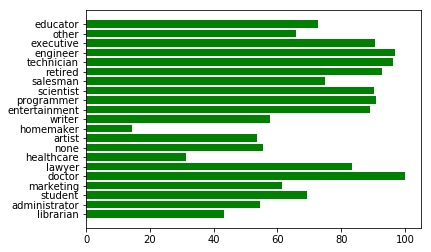

In [101]:
labels = list(dict(male_ration_per_occupation).keys())
values = [dict(male_ration_per_occupation)[label] for label in labels]
xindices = [i for i in range(len(values))]
print('Male Ration Per Occupation')
p = plt.barh(xindices,values,linewidth =5,tick_label=labels,color='g')

## 3 Most Male Ratio Occupation

In [103]:
male_ratio_per_occupation.sort_values(ascending=False).head(1)

occupation
doctor    100.0
Name: gender, dtype: float64

## 4 Min And Max Ages per occupation

In [122]:
min_age = frame.groupby('occupation').age.min()
max_age = frame.groupby('occupation').age.max()

In [127]:
dict(min_age)

{'administrator': 21,
 'artist': 19,
 'doctor': 28,
 'educator': 23,
 'engineer': 22,
 'entertainment': 15,
 'executive': 22,
 'healthcare': 22,
 'homemaker': 20,
 'lawyer': 21,
 'librarian': 23,
 'marketing': 24,
 'none': 11,
 'other': 13,
 'programmer': 20,
 'retired': 51,
 'salesman': 18,
 'scientist': 23,
 'student': 7,
 'technician': 21,
 'writer': 18}

In [126]:
dict(max_age)

{'administrator': 70,
 'artist': 48,
 'doctor': 64,
 'educator': 63,
 'engineer': 70,
 'entertainment': 50,
 'executive': 69,
 'healthcare': 62,
 'homemaker': 50,
 'lawyer': 53,
 'librarian': 69,
 'marketing': 55,
 'none': 55,
 'other': 64,
 'programmer': 63,
 'retired': 73,
 'salesman': 66,
 'scientist': 55,
 'student': 42,
 'technician': 55,
 'writer': 60}

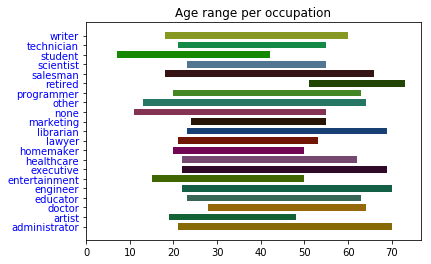

In [191]:
import random 

ind = range(len(min_age.values))    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

colors = ['#'+str(random.randint(100000,999999)) for _ in ind]

p1 = plt.barh(
    ind, list(min_age.values), width,color='white'
)
p2 = plt.barh(
    ind, list(max_age.values-min_age.values), width,left=list(min_age.values),color=colors
)

plt.title('Age range per occupation')
plt.yticks(ind, list(min_age.index),color='b')
plt.show()



## 5 Gender percentage per occupation

In [192]:
frame.groupby('occupation').gender.sum()

occupation
administrator    MMFMMFFMFFMMFMMFFMFFMMMMFMFMFFMFMMMMMFMFFFMMMF...
artist                                FFMFMFMFMMMFMFMFMMFFMMMFMMFF
doctor                                                     MMMMMMM
educator         MFMMMFMMMMFMMMFMMFFFFMFMMMMFMMMFMFMMMMMMMMMMFM...
engineer         MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
entertainment                                   MMMMMMMMMMMMMMFFMM
executive                         MMMMFMMMFMMMMMMMMMMMMMMMMMMMFMMM
healthcare                                        MMMFFFFMFFFFFFFM
homemaker                                                  FFFFFFM
lawyer                                                MMFMMMMMFMMM
librarian        MFFMFMFMFFFMFMFFFFMFFFFMFMMFMFMFMMMFFFFFMMFMMM...
marketing                               FMMMFFFMMMMFMMMMMFFFMMMFFM
none                                                     MMMFMFMFF
other            FFFFFFMMFMMMFFMMFMMMFMMFMFMMFFMMMMMFMFMMFMMMFM...
programmer       MMMMMMMMMMMMMMMMMMMMMMMMFFMMFMMFMF

In [201]:
gender_per_occupation = frame.groupby('occupation').gender.sum().apply(
    lambda x: "{}% men, {}% women".format(
        int(10000*x.count('M')/len(x))/100.0,
        int(10000*x.count('F')/len(x))/100.0,
    )
)
gender_per_occupation

occupation
administrator    54.43% men, 45.56% women
artist           53.57% men, 46.42% women
doctor             100.0% men, 0.0% women
educator         72.63% men, 27.36% women
engineer          97.01% men, 2.98% women
entertainment    88.88% men, 11.11% women
executive         90.62% men, 9.37% women
healthcare       31.25% men, 68.75% women
homemaker        14.28% men, 85.71% women
lawyer           83.33% men, 16.66% women
librarian        43.13% men, 56.86% women
marketing        61.53% men, 38.46% women
none             55.55% men, 44.44% women
other            65.71% men, 34.28% women
programmer         90.9% men, 9.09% women
retired           92.85% men, 7.14% women
salesman           75.0% men, 25.0% women
scientist         90.32% men, 9.67% women
student          69.38% men, 30.61% women
technician         96.29% men, 3.7% women
writer           57.77% men, 42.22% women
Name: gender, dtype: object

([<matplotlib.patches.Wedge at 0x7f4162de50f0>,
 [Text(-0.943958,1.35331,'men'), Text(0.943958,-1.35331,'women')])

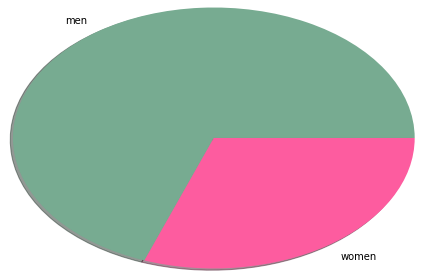

In [224]:
occupation = 'student'

plt.pie(
    [float(w.replace('%','')) for w in dict(gender_per_occupation)[occupation].split(' ') if '%' in w],
    labels=["men","women"],
    colors=['#77ab91','#fd5c9f'],
    shadow=True,
    radius=1.5,
)